In [9]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#path = '/content/gdrive/My Drive/Colab Notebooks/707/Labs/'
#import sys
#sys.path.append(path)

In [10]:
# !pip install Box2D
# !pip install box2d-py
# !pip install gym[all]
# !pip install gym[Box_2D]
# !pip install torc
# !pip install -U "ray[rllib]" torch
import gym 
env = gym.make("LunarLander-v2")

In [11]:
import ray
import ray.rllib.agents.dqn as dqn

def evaluation_fn(result):
    return result['episode_reward_mean']


def objective_fn(config):

    
    trainer = dqn.DQNTrainer(config=config)

    for i in range(10):
      # Perform one iteration of training the policy with DQN
      result = trainer.train()
      intermediate_score = evaluation_fn(result)
      
      # Feed the score back back to Tune.
      tune.report(iterations=i, mean_reward=intermediate_score)
      

## Use DQN and train your algorithm on the Dungeon environment.

You can take inspiration from:
https://docs.ray.io/en/latest/rllib/rllib-training.html#basic-python-api

Experiment with the different parameters of the configuration:
https://docs.ray.io/en/latest/rllib/rllib-algorithms.html#deep-q-networks-dqn-rainbow-parametric-dqn





In [12]:

import ray
import ray.rllib.agents.dqn as dqn
from ray.tune.logger import pretty_print
from ray import tune 

config = dqn.DEFAULT_CONFIG.copy()
config["dueling"] = tune.grid_search([True, False])
config["double_q"] = tune.grid_search([True, False])
config["model"] = { "fcnet_hiddens": [128, 128, 128],
                    "fcnet_activation": 'relu',
    }
config["env"] = "LunarLander-v2"
#config['lr'] = tune.loguniform(1e-4, 1e-1),
config["gamma"] = tune.uniform(0, 1)

analysis = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        num_samples=3,
        name='HP_tuning_LunarLander',
        config=config)


print("Best hyperparameters found were: ", analysis.best_config)


2022-04-13 15:46:39,814	WARNING tune.py:583 -- Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.


Trial name,status,loc,double_q,dueling,gamma
objective_fn_LunarLander-v2_86f01_00000,PENDING,,True,True,0.0433255
objective_fn_LunarLander-v2_86f01_00001,PENDING,,False,True,0.95332
objective_fn_LunarLander-v2_86f01_00002,PENDING,,True,False,0.0788217
objective_fn_LunarLander-v2_86f01_00003,PENDING,,False,False,0.130787
objective_fn_LunarLander-v2_86f01_00004,PENDING,,True,True,0.967337
objective_fn_LunarLander-v2_86f01_00005,PENDING,,False,True,0.740763
objective_fn_LunarLander-v2_86f01_00006,PENDING,,True,False,0.816257
objective_fn_LunarLander-v2_86f01_00007,PENDING,,False,False,0.71707
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144


 pid=24840) 2022-04-13 15:46:56,217	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=17960) 2022-04-13 15:46:56,193	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=14320) 2022-04-13 15:46:56,184	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=20680) 2022-04-13 15:46:56,231	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=1136) 2022-04-13 15:46:56,236	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=10064) 2022-04-13 15:46:56,293	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=10064) 2022-04-13 15:46:56,392	INFO trainer.py:2140 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
 pid=10064) 2022-04-13 15:46:56,394	INFO simple_q.py:154 -- In multi-agent mode, policies wi

Trial name,status,loc,double_q,dueling,gamma
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144


 pid=824) 2022-04-13 15:46:56,485	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=824) 2022-04-13 15:46:56,542	INFO trainer.py:2140 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
 pid=824) 2022-04-13 15:46:56,543	INFO simple_q.py:154 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting `simple_optimizer=True` if this doesn't work for you.
 pid=824) 2022-04-13 15:46:56,543	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


Trial name,status,loc,double_q,dueling,gamma
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144


 pid=14320) 2022-04-13 15:47:00,661	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=24304) 2022-04-13 15:47:00,673	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=20680) 2022-04-13 15:47:00,696	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=1136) 2022-04-13 15:47:00,742	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=10064) 2022-04-13 15:47:01,577	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=17960) 2022-04-13 15:47:01,559	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=824) 2022-04-13 15:47:01,613	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=24840) 2022-04-13 15:47:01,665	WARNING util.py:55 -- Install gputil for GPU system monitoring.


Trial name,status,loc,double_q,dueling,gamma
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144


Result for objective_fn_LunarLander-v2_86f01_00007:
  date: 2022-04-13_15-47-04
  done: false
  experiment_id: c7b0031d3d7842a4a093a61ee5a11fe9
  hostname: STEFANXPS
  iterations: 0
  iterations_since_restore: 1
  mean_reward: -189.8276113231841
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 93.35833333333333
    ram_util_percent: 87.24166666666667
  pid: 24304
  time_since_restore: 8.480954885482788
  time_this_iter_s: 8.480954885482788
  time_total_s: 8.480954885482788
  timestamp: 1649861224
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 86f01_00007
  
Result for objective_fn_LunarLander-v2_86f01_00006:
  date: 2022-04-13_15-47-04
  done: false
  experiment_id: bfdb03229c8743bba5de99ef17158f88
  hostname: STEFANXPS
  iterations: 0
  iterations_since_restore: 1
  mean_reward: -130.86036373202703
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 93.73333333333333
    ram_util_percent: 87.24166666666667
  pid: 20680
  time_since_restore: 8.610095262527466
  time_

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,1,9.81101,0,-241.271
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,1,9.76447,0,-200.83
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,1,8.81191,0,-237.09
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,1,8.6521,0,-173.975
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,1,9.96703,0,-204.435
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,1,9.62322,0,-146.922
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,1,8.6101,0,-130.86
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,1,8.48095,0,-189.828
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-47-12
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 1
  iterations_since_restore: 2
  mean_reward: -176.74408075872898
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.12999999999998
  pid: 14320
  time_since_restore: 16.12220788002014
  time_this_iter_s: 7.470103979110718
  time_total_s: 16.12220788002014
  timestamp: 1649861232
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00006:
  date: 2022-04-13_15-47-12
  done: false
  experiment_id: bfdb03229c8743bba5de99ef17158f88
  hostname: STEFANXPS
  iterations: 1
  iterations_since_restore: 2
  mean_reward: -181.81258563461944
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.12999999999998
  pid: 20680
  time_since_restore: 16.089167594909668
  time_this_iter_s: 7.4790723

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,1,9.81101,0,-241.271
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,1,9.76447,0,-200.83
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,2,16.2593,1,-180.977
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,2,16.1222,1,-176.744
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,1,9.96703,0,-204.435
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,1,9.62322,0,-146.922
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,2,16.0892,1,-181.813
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,2,16.0415,1,-186.644
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00005:
  date: 2022-04-13_15-47-13
  done: false
  experiment_id: 0e784fb17ec247da80ea7638efbeb341
  hostname: STEFANXPS
  iterations: 1
  iterations_since_restore: 2
  mean_reward: -154.28237796621974
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.23636363636363
  pid: 824
  time_since_restore: 17.44519352912903
  time_this_iter_s: 7.8219709396362305
  time_total_s: 17.44519352912903
  timestamp: 1649861233
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: 86f01_00005
  
Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-47-13
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 1
  iterations_since_restore: 2
  mean_reward: -200.39930824015124
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.22727272727272
  pid: 17960
  time_since_restore: 17.73536229133606
  time_this_iter_s: 7.924353599

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,2,17.7354,1,-200.399
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,2,18.5948,1,-215.527
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,2,16.2593,1,-180.977
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,2,16.1222,1,-176.744
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,2,17.9281,1,-187.079
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,2,17.4452,1,-154.282
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,2,16.0892,1,-181.813
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,2,16.0415,1,-186.644
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-47-19
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 2
  iterations_since_restore: 3
  mean_reward: -153.32811657776531
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.42727272727272
  pid: 14320
  time_since_restore: 23.71433186531067
  time_this_iter_s: 7.592123985290527
  time_total_s: 23.71433186531067
  timestamp: 1649861239
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00007:
  date: 2022-04-13_15-47-20
  done: false
  experiment_id: c7b0031d3d7842a4a093a61ee5a11fe9
  hostname: STEFANXPS
  iterations: 2
  iterations_since_restore: 3
  mean_reward: -162.39394317150644
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.42727272727272
  pid: 24304
  time_since_restore: 23.647995710372925
  time_this_iter_s: 7.6065313

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,3,25.3556,2,-180.216
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,3,26.9697,2,-171.181
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,3,24.0561,2,-161.355
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,3,23.7143,2,-153.328
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,3,25.7298,2,-155.112
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,3,25.1984,2,-155.311
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,3,23.835,2,-168.153
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,3,23.648,2,-162.394
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-47-27
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -153.90563021596023
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.82000000000001
  pid: 14320
  time_since_restore: 30.933756589889526
  time_this_iter_s: 7.219424724578857
  time_total_s: 30.933756589889526
  timestamp: 1649861247
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00006:
  date: 2022-04-13_15-47-27
  done: false
  experiment_id: bfdb03229c8743bba5de99ef17158f88
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -146.2532922390718
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.82000000000001
  pid: 20680
  time_since_restore: 31.318608045578003
  time_this_iter_s: 7.483579

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,3,25.3556,2,-180.216
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,3,26.9697,2,-171.181
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,4,31.491,3,-153.452
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,4,30.9338,3,-153.906
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,3,25.7298,2,-155.112
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,4,32.8803,3,-140.093
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,4,31.3186,3,-146.253
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,4,31.23,3,-150.25
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-47-29
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -168.84234605678677
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.93636363636365
  pid: 17960
  time_since_restore: 33.31118702888489
  time_this_iter_s: 7.955632448196411
  time_total_s: 33.31118702888489
  timestamp: 1649861249
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 86f01_00000
  
Result for objective_fn_LunarLander-v2_86f01_00004:
  date: 2022-04-13_15-47-29
  done: false
  experiment_id: 87fa11dfd3084d41bf49666c2769680f
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -148.93836647323727
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 89.99090909090908
  pid: 24840
  time_since_restore: 33.72101092338562
  time_this_iter_s: 7.99118399

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,4,33.3112,3,-168.842
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,4,34.995,3,-162.242
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,4,31.491,3,-153.452
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,5,38.7845,4,-147.781
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,4,33.721,3,-148.938
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,4,32.8803,3,-140.093
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,4,31.3186,3,-146.253
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,4,31.23,3,-150.25
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00006:
  date: 2022-04-13_15-47-35
  done: false
  experiment_id: bfdb03229c8743bba5de99ef17158f88
  hostname: STEFANXPS
  iterations: 4
  iterations_since_restore: 5
  mean_reward: -133.3548038239425
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.39090909090909
  pid: 20680
  time_since_restore: 38.877673864364624
  time_this_iter_s: 7.559065818786621
  time_total_s: 38.877673864364624
  timestamp: 1649861255
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 86f01_00006
  
Result for objective_fn_LunarLander-v2_86f01_00002:
  date: 2022-04-13_15-47-35
  done: false
  experiment_id: 2025156e6fbe4e38914b903adc2c77ef
  hostname: STEFANXPS
  iterations: 4
  iterations_since_restore: 5
  mean_reward: -144.6614343854348
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.42
  pid: 1136
  time_since_restore: 39.13589835166931
  time_this_iter_s: 7.644865274429321
  tim

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,5,40.8921,4,-158.188
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,5,42.4954,4,-144.67
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,5,39.1359,4,-144.661
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,5,38.7845,4,-147.781
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,5,41.3468,4,-137.398
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,5,40.3883,4,-128.195
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,5,38.8777,4,-133.355
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,5,41.1663,4,-144.702
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-47-42
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 5
  iterations_since_restore: 6
  mean_reward: -145.84302039502407
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.75
  pid: 14320
  time_since_restore: 45.918556690216064
  time_this_iter_s: 7.134023189544678
  time_total_s: 45.918556690216064
  timestamp: 1649861262
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00002:
  date: 2022-04-13_15-47-42
  done: false
  experiment_id: 2025156e6fbe4e38914b903adc2c77ef
  hostname: STEFANXPS
  iterations: 5
  iterations_since_restore: 6
  mean_reward: -138.43742496207523
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.73636363636363
  pid: 1136
  time_since_restore: 46.4274845123291
  time_this_iter_s: 7.29158616065979
  tim

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,6,48.2852,5,-155.419
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,6,49.9281,5,-137.106
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,6,46.4275,5,-138.437
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,6,45.9186,5,-145.843
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,6,49.0984,5,-139.317
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,6,48.267,5,-125.949
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,6,46.4526,5,-136.685
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,6,48.8524,5,-139.13
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,6,48.2852,5,-155.419
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,6,49.9281,5,-137.106
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,6,46.4275,5,-138.437
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,6,45.9186,5,-145.843
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,6,49.0984,5,-139.317
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,6,48.267,5,-125.949
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,6,46.4526,5,-136.685
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,6,48.8524,5,-139.13
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-47-54
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -147.8116993859035
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.0764705882353
  pid: 14320
  time_since_restore: 58.2854380607605
  time_this_iter_s: 12.366881370544434
  time_total_s: 58.2854380607605
  timestamp: 1649861274
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00002:
  date: 2022-04-13_15-47-55
  done: false
  experiment_id: 2025156e6fbe4e38914b903adc2c77ef
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -143.34352954506556
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.11666666666666
  pid: 1136
  time_since_restore: 59.74258995056152
  time_this_iter_s: 13.31510543823

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,6,48.2852,5,-155.419
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,6,49.9281,5,-137.106
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,7,59.7426,6,-143.344
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,7,58.2854,6,-147.812
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,6,49.0984,5,-139.317
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,6,48.267,5,-125.949
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,6,46.4526,5,-136.685
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,6,48.8524,5,-139.13
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-48-01
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -150.35124921174327
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 95.83333333333333
    ram_util_percent: 91.16249999999998
  pid: 17960
  time_since_restore: 65.44363212585449
  time_this_iter_s: 17.15846872329712
  time_total_s: 65.44363212585449
  timestamp: 1649861281
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 86f01_00000
  


Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,7,65.4436,6,-150.351
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,6,49.9281,5,-137.106
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,7,59.7426,6,-143.344
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,7,58.2854,6,-147.812
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,6,49.0984,5,-139.317
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,6,48.267,5,-125.949
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,6,46.4526,5,-136.685
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,6,48.8524,5,-139.13
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00006:
  date: 2022-04-13_15-48-02
  done: false
  experiment_id: bfdb03229c8743bba5de99ef17158f88
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -131.95059889384427
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.14074074074071
  pid: 20680
  time_since_restore: 66.594158411026
  time_this_iter_s: 20.141537189483643
  time_total_s: 66.594158411026
  timestamp: 1649861282
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 86f01_00006
  
Result for objective_fn_LunarLander-v2_86f01_00007:
  date: 2022-04-13_15-48-04
  done: false
  experiment_id: c7b0031d3d7842a4a093a61ee5a11fe9
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -135.08317842388448
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.17037037037036
  pid: 24304
  time_since_restore: 68.1607301235199
  time_this_iter_s: 19.30829429626

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,7,65.4436,6,-150.351
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,7,69.4813,6,-130.033
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,7,59.7426,6,-143.344
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,7,58.2854,6,-147.812
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,7,69.0634,6,-143.587
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,7,70.9398,6,-117.385
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,7,66.5942,6,-131.951
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,7,68.1607,6,-135.083
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-48-12
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -144.2463456881793
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 99.988
    ram_util_percent: 91.15199999999999
  pid: 14320
  time_since_restore: 76.26940393447876
  time_this_iter_s: 17.98396587371826
  time_total_s: 76.26940393447876
  timestamp: 1649861292
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 86f01_00003
  
Result for objective_fn_LunarLander-v2_86f01_00002:
  date: 2022-04-13_15-48-12
  done: false
  experiment_id: 2025156e6fbe4e38914b903adc2c77ef
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -148.55429788225197
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.14347826086956
  pid: 1136
  time_since_restore: 76.247323513031
  time_this_iter_s: 16.5047335624

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,7,65.4436,6,-150.351
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,7,69.4813,6,-130.033
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,8,76.2473,7,-148.554
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,8,76.2694,7,-144.246
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,7,69.0634,6,-143.587
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,7,70.9398,6,-117.385
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,7,66.5942,6,-131.951
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,7,68.1607,6,-135.083
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-48-16
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -147.4894139238214
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 99.99
    ram_util_percent: 91.16
  pid: 17960
  time_since_restore: 79.93348693847656
  time_this_iter_s: 14.48985481262207
  time_total_s: 79.93348693847656
  timestamp: 1649861296
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 86f01_00000
  
Result for objective_fn_LunarLander-v2_86f01_00007:
  date: 2022-04-13_15-48-17
  done: false
  experiment_id: c7b0031d3d7842a4a093a61ee5a11fe9
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -137.96454755911563
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.17647058823529
  pid: 24304
  time_since_restore: 80.90974593162537
  time_this_iter_s: 12.749015808105469
  ti

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,8,79.9335,7,-147.489
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,7,69.4813,6,-130.033
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,8,76.2473,7,-148.554
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,8,76.2694,7,-144.246
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,8,82.7034,7,-142.962
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,7,70.9398,6,-117.385
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,8,81.2792,7,-127.233
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,8,80.9097,7,-137.965
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00005:
  date: 2022-04-13_15-48-20
  done: false
  experiment_id: 0e784fb17ec247da80ea7638efbeb341
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -117.49672643904704
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.23888888888888
  pid: 824
  time_since_restore: 84.23275232315063
  time_this_iter_s: 13.292906045913696
  time_total_s: 84.23275232315063
  timestamp: 1649861300
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 86f01_00005
  
Result for objective_fn_LunarLander-v2_86f01_00001:
  date: 2022-04-13_15-48-20
  done: false
  experiment_id: 05a6dafbacb847adae486a6545518463
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -116.57600920507299
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 95.23809523809524
    ram_util_percent: 91.23809523809526
  pid: 10064
  time_since_restore: 84.58016657829285
  time_this_iter_s:

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,8,79.9335,7,-147.489
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,8,84.5802,7,-116.576
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,9,87.2898,8,-152.314
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,8,76.2694,7,-144.246
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,8,82.7034,7,-142.962
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,8,84.2328,7,-117.497
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,8,81.2792,7,-127.233
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,8,80.9097,7,-137.965
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-48-26
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 8
  iterations_since_restore: 9
  mean_reward: -147.86200832306807
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.39285714285714
  pid: 17960
  time_since_restore: 90.46609377861023
  time_this_iter_s: 10.532606840133667
  time_total_s: 90.46609377861023
  timestamp: 1649861306
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 86f01_00000
  
Result for objective_fn_LunarLander-v2_86f01_00003:
  date: 2022-04-13_15-48-27
  done: false
  experiment_id: 4d03424f70ad49db8fe8a1d979f4e173
  hostname: STEFANXPS
  iterations: 8
  iterations_since_restore: 9
  mean_reward: -142.39500533415261
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 95.0
    ram_util_percent: 91.35499999999999
  pid: 14320
  time_since_restore: 90.95867896080017
  time_this_iter_s: 14.6892750

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,9,90.4661,8,-147.862
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,8,84.5802,7,-116.576
objective_fn_LunarLander-v2_86f01_00002,RUNNING,127.0.0.1:1136,True,False,0.0788217,9,87.2898,8,-152.314
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,9,90.9587,8,-142.395
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,9,94.0957,8,-141.522
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,8,84.2328,7,-117.497
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,9,91.8186,8,-130.047
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,9,92.0212,8,-135.571
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,


Result for objective_fn_LunarLander-v2_86f01_00005:
  date: 2022-04-13_15-48-32
  done: false
  experiment_id: 0e784fb17ec247da80ea7638efbeb341
  hostname: STEFANXPS
  iterations: 8
  iterations_since_restore: 9
  mean_reward: -125.15864315397862
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.525
  pid: 824
  time_since_restore: 95.56666851043701
  time_this_iter_s: 11.333916187286377
  time_total_s: 95.56666851043701
  timestamp: 1649861312
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 86f01_00005
  
Result for objective_fn_LunarLander-v2_86f01_00002:
  date: 2022-04-13_15-48-32
  done: false
  experiment_id: 2025156e6fbe4e38914b903adc2c77ef
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -156.6457605879738
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 91.58461538461539
  pid: 1136
  time_since_restore: 96.6070761680603
  time_this_iter_s: 9.317231178283691
  time

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,RUNNING,127.0.0.1:17960,True,True,0.0433255,9,90.4661,8,-147.862
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,9,97.2912,8,-116.697
objective_fn_LunarLander-v2_86f01_00003,RUNNING,127.0.0.1:14320,False,False,0.130787,9,90.9587,8,-142.395
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,9,94.0957,8,-141.522
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,9,95.5667,8,-125.159
objective_fn_LunarLander-v2_86f01_00006,RUNNING,127.0.0.1:20680,True,False,0.816257,9,91.8186,8,-130.047
objective_fn_LunarLander-v2_86f01_00007,RUNNING,127.0.0.1:24304,False,False,0.71707,9,92.0212,8,-135.571
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,
objective_fn_LunarLander-v2_86f01_00010,PENDING,,True,False,0.804232,,,,


Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-48-36
  done: false
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -145.45690621304595
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.95714285714284
  pid: 17960
  time_since_restore: 100.4325578212738
  time_this_iter_s: 9.966464042663574
  time_total_s: 100.4325578212738
  timestamp: 1649861316
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 86f01_00000
  
Result for objective_fn_LunarLander-v2_86f01_00000:
  date: 2022-04-13_15-48-36
  done: true
  experiment_id: ed6bbd793cd743219e568d60ae5a12c5
  experiment_tag: 0_double_q=True,dueling=True,gamma=0.043326
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -145.45690621304595
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 100.0
    ram_util_percent: 90.95714285714284
  pid: 17960
  time

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00001,RUNNING,127.0.0.1:10064,False,True,0.95332,9,97.2912,8,-116.697
objective_fn_LunarLander-v2_86f01_00004,RUNNING,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,RUNNING,127.0.0.1:824,False,True,0.740763,9,95.5667,8,-125.159
objective_fn_LunarLander-v2_86f01_00008,PENDING,,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,PENDING,,False,True,0.836144,,,,
objective_fn_LunarLander-v2_86f01_00010,PENDING,,True,False,0.804232,,,,
objective_fn_LunarLander-v2_86f01_00011,PENDING,,False,False,0.267725,,,,
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486


Result for objective_fn_LunarLander-v2_86f01_00004:
  date: 2022-04-13_15-48-40
  done: true
  experiment_id: 87fa11dfd3084d41bf49666c2769680f
  experiment_tag: 4_double_q=True,dueling=True,gamma=0.96734
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -141.41720364275187
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 99.95714285714287
    ram_util_percent: 87.82142857142857
  pid: 24840
  time_since_restore: 104.50331473350525
  time_this_iter_s: 10.407607793807983
  time_total_s: 104.50331473350525
  timestamp: 1649861320
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 86f01_00004
  
Result for objective_fn_LunarLander-v2_86f01_00005:
  date: 2022-04-13_15-48-42
  done: false
  experiment_id: 0e784fb17ec247da80ea7638efbeb341
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -124.12003062288676
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 99.92857142857143
    ram_util_percent: 85.51428571

 pid=3476) 2022-04-13 15:48:52,977	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=3476) 2022-04-13 15:48:53,048	INFO trainer.py:2140 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
 pid=3476) 2022-04-13 15:48:53,049	INFO simple_q.py:154 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting `simple_optimizer=True` if this doesn't work for you.
 pid=3476) 2022-04-13 15:48:53,049	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
 pid=13992) 2022-04-13 15:48:54,236	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=13992) 2022-04-13 15:48:54,306	INFO trainer.py:2140 -- Your framework setting is 'tf', meaning you 

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,,,,
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,,,,
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,,,,
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


 pid=14596) 2022-04-13 15:48:56,630	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=14596) 2022-04-13 15:48:56,706	INFO trainer.py:2140 -- Your framework setting is 'tf', meaning you are using static-graph mode. Set framework='tf2' to enable eager execution with tf2.x. You may also then want to set eager_tracing=True in order to reach similar execution speed as with static-graph mode.
 pid=14596) 2022-04-13 15:48:56,708	INFO simple_q.py:154 -- In multi-agent mode, policies will be optimized sequentially by the multi-GPU optimizer. Consider setting `simple_optimizer=True` if this doesn't work for you.
 pid=14596) 2022-04-13 15:48:56,708	INFO trainer.py:779 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
 pid=13992) 2022-04-13 15:48:56,761	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 pid=3476) 2022-04-13 15:48:57,165	WARNING util.py:55 -- Install gputil for GPU system monitoring.
 

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,,,,
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,,,,
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,,,,
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,,,,
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


 pid=14596) 2022-04-13 15:48:59,419	WARNING util.py:55 -- Install gputil for GPU system monitoring.


Result for objective_fn_LunarLander-v2_86f01_00010:
  date: 2022-04-13_15-48-59
  done: false
  experiment_id: 2bdbeac66bbc4ad9b93910add84fd0eb
  hostname: STEFANXPS
  iterations: 0
  iterations_since_restore: 1
  mean_reward: -194.91274554167794
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 75.6375
    ram_util_percent: 61.25
  pid: 13992
  time_since_restore: 5.563023090362549
  time_this_iter_s: 5.563023090362549
  time_total_s: 5.563023090362549
  timestamp: 1649861339
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 86f01_00010
  
Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-00
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 0
  iterations_since_restore: 1
  mean_reward: -184.7413608743884
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 74.5
    ram_util_percent: 61.11
  pid: 3476
  time_since_restore: 7.398128032684326
  time_this_iter_s: 7.398128032684326
  time_total_s: 7

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,1,7.39813,0,-184.741
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,1,6.22915,0,-229.278
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,1,5.56302,0,-194.913
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,1,5.36488,0,-169.46
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,2,11.9528,1,-164.413
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,2,10.771,1,-230.443
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,2,10.0677,1,-166.657
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,2,9.75859,1,-177.338
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00010:
  date: 2022-04-13_15-49-08
  done: false
  experiment_id: 2bdbeac66bbc4ad9b93910add84fd0eb
  hostname: STEFANXPS
  iterations: 2
  iterations_since_restore: 3
  mean_reward: -155.87225570095526
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 68.98333333333333
    ram_util_percent: 62.48333333333333
  pid: 13992
  time_since_restore: 14.33164119720459
  time_this_iter_s: 4.263921022415161
  time_total_s: 14.33164119720459
  timestamp: 1649861348
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 86f01_00010
  
Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-10
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 2
  iterations_since_restore: 3
  mean_reward: -147.28462960873142
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 76.7125
    ram_util_percent: 62.4875
  pid: 3476
  time_since_restore: 17.952472686767578
  time_this_iter_s: 5.9997

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,3,17.9525,2,-147.285
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,3,18.3591,2,-213.602
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,3,14.3316,2,-155.872
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,2,9.75859,1,-177.338
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00011:
  date: 2022-04-13_15-49-17
  done: false
  experiment_id: 2eab9f557a4f4ca087e9114feec74a28
  hostname: STEFANXPS
  iterations: 2
  iterations_since_restore: 3
  mean_reward: -189.4276241694965
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 72.43333333333334
    ram_util_percent: 62.43333333333332
  pid: 14596
  time_since_restore: 20.453437328338623
  time_this_iter_s: 10.694851398468018
  time_total_s: 20.453437328338623
  timestamp: 1649861357
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: 86f01_00011
  


Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,3,17.9525,2,-147.285
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,3,18.3591,2,-213.602
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,3,14.3316,2,-155.872
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,3,20.4534,2,-189.428
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00010:
  date: 2022-04-13_15-49-22
  done: false
  experiment_id: 2bdbeac66bbc4ad9b93910add84fd0eb
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -148.78373885929753
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 85.23684210526316
    ram_util_percent: 62.41052631578948
  pid: 13992
  time_since_restore: 27.924818992614746
  time_this_iter_s: 13.593177795410156
  time_total_s: 27.924818992614746
  timestamp: 1649861362
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 86f01_00010
  
Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-23
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -138.00097483115667
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 84.98888888888888
    ram_util_percent: 62.40555555555555
  pid: 3476
  time_since_restore: 30.795475482940674
  t

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,4,30.7955,3,-138.001
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,3,18.3591,2,-213.602
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,4,27.9248,3,-148.784
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,3,20.4534,2,-189.428
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-49-25
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -183.37127459270937
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 84.47222222222223
    ram_util_percent: 62.383333333333326
  pid: 25084
  time_since_restore: 30.937912702560425
  time_this_iter_s: 12.578839302062988
  time_total_s: 30.937912702560425
  timestamp: 1649861365
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: 86f01_00009
  
Result for objective_fn_LunarLander-v2_86f01_00011:
  date: 2022-04-13_15-49-26
  done: false
  experiment_id: 2eab9f557a4f4ca087e9114feec74a28
  hostname: STEFANXPS
  iterations: 3
  iterations_since_restore: 4
  mean_reward: -173.64850156510641
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 43.44615384615385
    ram_util_percent: 62.37692307692306
  pid: 14596
  time_since_restore: 29.558783292770386
 

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,4,30.7955,3,-138.001
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,4,30.9379,3,-183.371
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,5,35.6719,4,-137.966
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,4,29.5588,3,-173.649
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-31
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 4
  iterations_since_restore: 5
  mean_reward: -128.3548568386679
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 77.33636363636363
    ram_util_percent: 62.29999999999998
  pid: 3476
  time_since_restore: 38.3273446559906
  time_this_iter_s: 7.531869173049927
  time_total_s: 38.3273446559906
  timestamp: 1649861371
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: 86f01_00008
  
Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-49-32
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 4
  iterations_since_restore: 5
  mean_reward: -168.3400973781392
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 75.33
    ram_util_percent: 62.29999999999999
  pid: 25084
  time_since_restore: 38.01993489265442
  time_this_iter_s: 7.0

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,5,38.3273,4,-128.355
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,5,38.0199,4,-168.34
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,5,35.6719,4,-137.966
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,5,36.4937,4,-163.042
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00010:
  date: 2022-04-13_15-49-37
  done: false
  experiment_id: 2bdbeac66bbc4ad9b93910add84fd0eb
  hostname: STEFANXPS
  iterations: 5
  iterations_since_restore: 6
  mean_reward: -136.26634723405678
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 72.80909090909091
    ram_util_percent: 62.37272727272727
  pid: 13992
  time_since_restore: 43.11652755737305
  time_this_iter_s: 7.444629430770874
  time_total_s: 43.11652755737305
  timestamp: 1649861377
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: 86f01_00010
  
Result for objective_fn_LunarLander-v2_86f01_00011:
  date: 2022-04-13_15-49-38
  done: false
  experiment_id: 2eab9f557a4f4ca087e9114feec74a28
  hostname: STEFANXPS
  iterations: 5
  iterations_since_restore: 6
  mean_reward: -154.35091945626985
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 71.69999999999999
    ram_util_percent: 62.4625
  pid: 14596
  time_since_restore: 42.31232213973999
  time_this_iter

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,6,46.8025,5,-126.486
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,6,45.5219,5,-161.019
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,6,43.1165,5,-136.266
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,6,42.3123,5,-154.351
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00011:
  date: 2022-04-13_15-49-44
  done: false
  experiment_id: 2eab9f557a4f4ca087e9114feec74a28
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -145.40499692152085
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 73.5125
    ram_util_percent: 62.75
  pid: 14596
  time_since_restore: 48.16844940185547
  time_this_iter_s: 5.8561272621154785
  time_total_s: 48.16844940185547
  timestamp: 1649861384
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 86f01_00011
  
Result for objective_fn_LunarLander-v2_86f01_00010:
  date: 2022-04-13_15-49-44
  done: false
  experiment_id: 2bdbeac66bbc4ad9b93910add84fd0eb
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -131.6724989189041
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 77.0909090909091
    ram_util_percent: 62.72727272727272
  pid: 13992
  time_since_restore: 50.724303007125854
  time_this_iter_s: 7.607775

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,6,46.8025,5,-126.486
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,6,45.5219,5,-161.019
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,7,50.7243,6,-131.672
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,7,48.1684,6,-145.405
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-46
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -123.9174633880407
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 77.2
    ram_util_percent: 62.77
  pid: 3476
  time_since_restore: 53.593900203704834
  time_this_iter_s: 6.791424989700317
  time_total_s: 53.593900203704834
  timestamp: 1649861386
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: 86f01_00008
  
Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-49-46
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 6
  iterations_since_restore: 7
  mean_reward: -154.72092769667114
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 77.12
    ram_util_percent: 62.760000000000005
  pid: 25084
  time_since_restore: 52.47519493103027
  time_this_iter_s: 6.953283071517944
  ti

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,7,53.5939,6,-123.917
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,7,52.4752,6,-154.721
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,8,56.5515,7,-126.984
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,8,53.2716,7,-150.347
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-49-52
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -144.29140555796226
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 73.275
    ram_util_percent: 62.83749999999999
  pid: 25084
  time_since_restore: 58.19709610939026
  time_this_iter_s: 5.721901178359985
  time_total_s: 58.19709610939026
  timestamp: 1649861392
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: 86f01_00009
  
Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-53
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 7
  iterations_since_restore: 8
  mean_reward: -123.09468032075068
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 72.00999999999999
    ram_util_percent: 62.80999999999999
  pid: 3476
  time_since_restore: 60.505433082580566
  time_this_iter_

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,8,60.5054,7,-123.095
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,8,58.1971,7,-144.291
objective_fn_LunarLander-v2_86f01_00010,RUNNING,127.0.0.1:13992,True,False,0.804232,9,62.3789,8,-125.492
objective_fn_LunarLander-v2_86f01_00011,RUNNING,127.0.0.1:14596,False,False,0.267725,9,58.6195,8,-148.747
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12


Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-49-58
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 8
  iterations_since_restore: 9
  mean_reward: -142.8256176371029
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 71.53333333333333
    ram_util_percent: 62.93333333333333
  pid: 25084
  time_since_restore: 64.20189595222473
  time_this_iter_s: 6.004799842834473
  time_total_s: 64.20189595222473
  timestamp: 1649861398
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: 86f01_00009
  
Result for objective_fn_LunarLander-v2_86f01_00008:
  date: 2022-04-13_15-49-59
  done: false
  experiment_id: 7a53d7ea98674b2199b8a83d9a7b9480
  hostname: STEFANXPS
  iterations: 8
  iterations_since_restore: 9
  mean_reward: -120.77523777831277
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 73.15
    ram_util_percent: 62.987500000000004
  pid: 3476
  time_since_restore: 66.4915542602539
  time_this_iter_s: 

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00008,RUNNING,127.0.0.1:3476,True,True,0.990601,9,66.4916,8,-120.775
objective_fn_LunarLander-v2_86f01_00009,RUNNING,127.0.0.1:25084,False,True,0.836144,9,64.2019,8,-142.826
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12
objective_fn_LunarLander-v2_86f01_00006,TERMINATED,127.0.0.1:20680,True,False,0.816257,10,101.7,9,-138.222
objective_fn_LunarLander-v2_86f01_00007,TERMINATED,127.0.0.1:24304,False,False,0.71707,10,102.346,9,-141.675


Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-50-03
  done: false
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -144.36701483854728
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 62.89999999999999
    ram_util_percent: 60.74285714285714
  pid: 25084
  time_since_restore: 69.45662832260132
  time_this_iter_s: 5.254732370376587
  time_total_s: 69.45662832260132
  timestamp: 1649861403
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: 86f01_00009
  
Result for objective_fn_LunarLander-v2_86f01_00009:
  date: 2022-04-13_15-50-03
  done: true
  experiment_id: 19aae552a0754cc0aa150c58be340e7b
  experiment_tag: 9_double_q=False,dueling=True,gamma=0.83614
  hostname: STEFANXPS
  iterations: 9
  iterations_since_restore: 10
  mean_reward: -144.36701483854728
  node_ip: 127.0.0.1
  perf:
    cpu_util_percent: 62.89999999999999
    ram_util_percent: 60.7428571428

Trial name,status,loc,double_q,dueling,gamma,iter,total time (s),iterations,mean_reward
objective_fn_LunarLander-v2_86f01_00000,TERMINATED,127.0.0.1:17960,True,True,0.0433255,10,100.433,9,-145.457
objective_fn_LunarLander-v2_86f01_00001,TERMINATED,127.0.0.1:10064,False,True,0.95332,10,106.676,9,-119.403
objective_fn_LunarLander-v2_86f01_00002,TERMINATED,127.0.0.1:1136,True,False,0.0788217,10,96.6071,9,-156.646
objective_fn_LunarLander-v2_86f01_00003,TERMINATED,127.0.0.1:14320,False,False,0.130787,10,101.207,9,-149.486
objective_fn_LunarLander-v2_86f01_00004,TERMINATED,127.0.0.1:24840,True,True,0.967337,10,104.503,9,-141.417
objective_fn_LunarLander-v2_86f01_00005,TERMINATED,127.0.0.1:824,False,True,0.740763,10,105.842,9,-124.12
objective_fn_LunarLander-v2_86f01_00006,TERMINATED,127.0.0.1:20680,True,False,0.816257,10,101.7,9,-138.222
objective_fn_LunarLander-v2_86f01_00007,TERMINATED,127.0.0.1:24304,False,False,0.71707,10,102.346,9,-141.675
objective_fn_LunarLander-v2_86f01_00008,TERMINATED,127.0.0.1:3476,True,True,0.990601,10,72.677,9,-119.947
objective_fn_LunarLander-v2_86f01_00009,TERMINATED,127.0.0.1:25084,False,True,0.836144,10,69.4566,9,-144.367


2022-04-13 15:50:06,325	INFO tune.py:639 -- Total run time: 206.52 seconds (205.89 seconds for the tuning loop).


Best hyperparameters found were:  {'num_workers': 0, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 4, 'batch_mode': 'truncate_episodes', 'gamma': 0.9533203589172566, 'lr': 0.0005, 'train_batch_size': 32, 'model': {'fcnet_hiddens': [128, 128, 128], 'fcnet_activation': 'relu'}, 'optimizer': {}, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env': 'LunarLander-v2', 'observation_space': None, 'action_space': None, 'env_config': {}, 'remote_worker_envs': False, 'remote_env_batch_wait_ms': 0, 'env_task_fn': None, 'render_env': False, 'record_env': False, 'clip_rewards': None, 'normalize_actions': True, 'clip_actions': False, 'preprocessor_pref': 'deepmind', 'log_level': 'WARN', 'callbacks': <class 'ray.rllib.agents.callbacks.DefaultCallbacks'>, 'ignore_worker_failures': False, 'log_sys_usage': True, 'fake_sampler': False, 'framework': 'tf', 'eager_tracing': False, 'eager_max_retraces': 20, 'explore': True, 'exploration_config': {'type'

In [13]:
print("Best hyperparameters found were: ", analysis.best_config)

Best hyperparameters found were:  {'num_workers': 0, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 4, 'batch_mode': 'truncate_episodes', 'gamma': 0.9533203589172566, 'lr': 0.0005, 'train_batch_size': 32, 'model': {'fcnet_hiddens': [128, 128, 128], 'fcnet_activation': 'relu'}, 'optimizer': {}, 'horizon': None, 'soft_horizon': False, 'no_done_at_end': False, 'env': 'LunarLander-v2', 'observation_space': None, 'action_space': None, 'env_config': {}, 'remote_worker_envs': False, 'remote_env_batch_wait_ms': 0, 'env_task_fn': None, 'render_env': False, 'record_env': False, 'clip_rewards': None, 'normalize_actions': True, 'clip_actions': False, 'preprocessor_pref': 'deepmind', 'log_level': 'WARN', 'callbacks': <class 'ray.rllib.agents.callbacks.DefaultCallbacks'>, 'ignore_worker_failures': False, 'log_sys_usage': True, 'fake_sampler': False, 'framework': 'tf', 'eager_tracing': False, 'eager_max_retraces': 20, 'explore': True, 'exploration_config': {'type'

In [14]:
df = analysis.dataframe(metric="mean_reward", mode="max")
df[['config/gamma', 'config/double_q', 'config/dueling', 'mean_reward']]

,config/gamma,config/double_q,config/dueling,mean_reward
0,0.043326,True,True,-145.456906
1,0.953320,False,True,-116.576009
2,0.078822,True,False,-138.437425
3,0.130787,False,False,-142.395005
4,0.967337,True,True,-137.398433
5,0.740763,False,True,-117.385350
6,0.816257,True,False,-127.233411
7,0.717070,False,False,-135.083178
8,0.990601,True,True,-119.947227
9,0.836144,False,True,-142.825618


In [87]:
list(analysis.trial_dataframes.values())[0]
list(analysis._configs.items())[2][1]['config/gamma']

0.07882173132914883

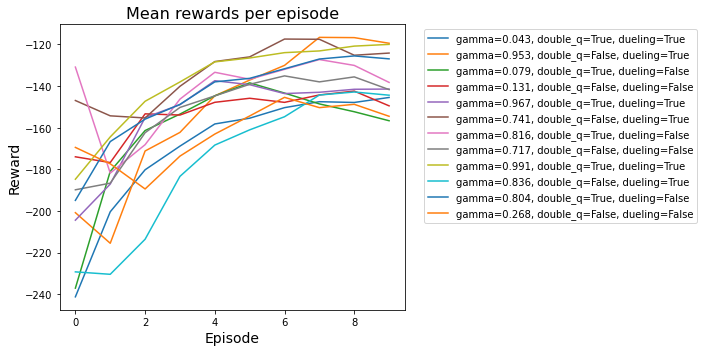

In [88]:
import matplotlib.pyplot as plt


# Plot mean rewards of all models
num_models = len(analysis.trial_dataframes.values())
fig, ax = plt.subplots(1,1,figsize=(10,5))

for i in range(num_models):
    trial_df = list(analysis.trial_dataframes.values())[i]

    gamma = list(analysis._configs.items())[i][1]['config/gamma']
    double_q = list(analysis._configs.items())[i][1]['config/double_q']
    dueling = list(analysis._configs.items())[i][1]['config/dueling']
    
    rewards = trial_df['mean_reward'] # Add this for moving average filter:   .rolling(window=5).mean()
    ax.plot(trial_df['mean_reward'], label="gamma={:.3f}, double_q={}, dueling={}".format(gamma, double_q, dueling))


ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Mean rewards per episode", fontsize=16)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Reward", fontsize=14)
plt.tight_layout()
plt.show()

https://docs.ray.io/en/latest/tune/api_docs/analysis.html

In [15]:
from ray.tune import ExperimentAnalysis
analysis_result = ExperimentAnalysis("~/ray_results/HP_tuning_LunarLander")

2022-04-13 15:50:07,383	INFO experiment_analysis.py:696 -- No `self.trials`. Drawing logdirs from checkpoint file. This may result in some information that is out of sync, as checkpointing is periodic.
